## 1-Exploring data
## importing needed liberaries

In [1]:
import os
import random
from shutil import copy2

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import PIL
import torch
import torchvision
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from tqdm.notebook import tqdm

In [2]:
print("torch version : ", torch.__version__)
print("torchvision version : ", torchvision.__version__)
print("numpy version : ", np.__version__)
print("matplotlib version : ", matplotlib.__version__)

!python --version

torch version :  2.2.2+cu121
torchvision version :  0.17.2+cu121
numpy version :  1.26.3
matplotlib version :  3.9.2
Python 3.11.0


## Exploring our data 

In [3]:
# make a variable for train dir
data_dir = "../data_p2"
train_dir = os.path.join(data_dir,"train")


print("Data directory:", train_dir)

Data directory: ../data_p2/train


In [4]:
# list trian_dir content (classes)

classes=os.listdir(train_dir)
classes

['cassava-healthy',
 'cassava-mosaic-disease-cmd',
 'cassava-brown-streak-disease-cbsd',
 'cassava-green-mottle-cgm',
 'cassava-bacterial-blight-cbb']

## ploting some random samples of each class 
### we will use **sample_images** function from **src.utils** directory

In [5]:
import sys
sys.path.append("../src")

In [6]:
from utils.sample_images import sample_images

In [7]:
sample_images?

Signature: sample_images(data_path, classname)
Docstring: <no docstring>
File:      /app/src/utils/sample_images.py
Type:      function

In [8]:
print ("a Random images of cassava-healthy class :")
print ("")
sample_images(train_dir,"cassava-healthy")


a Random images of cassava-healthy class :



a Random images of cassava-mosaic-disease-cmd class :



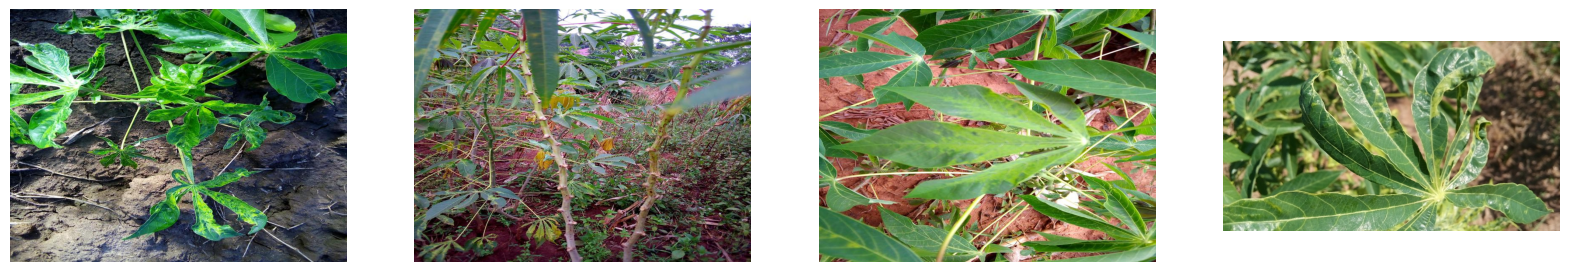

In [9]:
print ("a Random images of cassava-mosaic-disease-cmd class :")
print ("")
sample_images(train_dir,"cassava-mosaic-disease-cmd")

a Random images of cassava-brown-streak-disease-cbsd class :



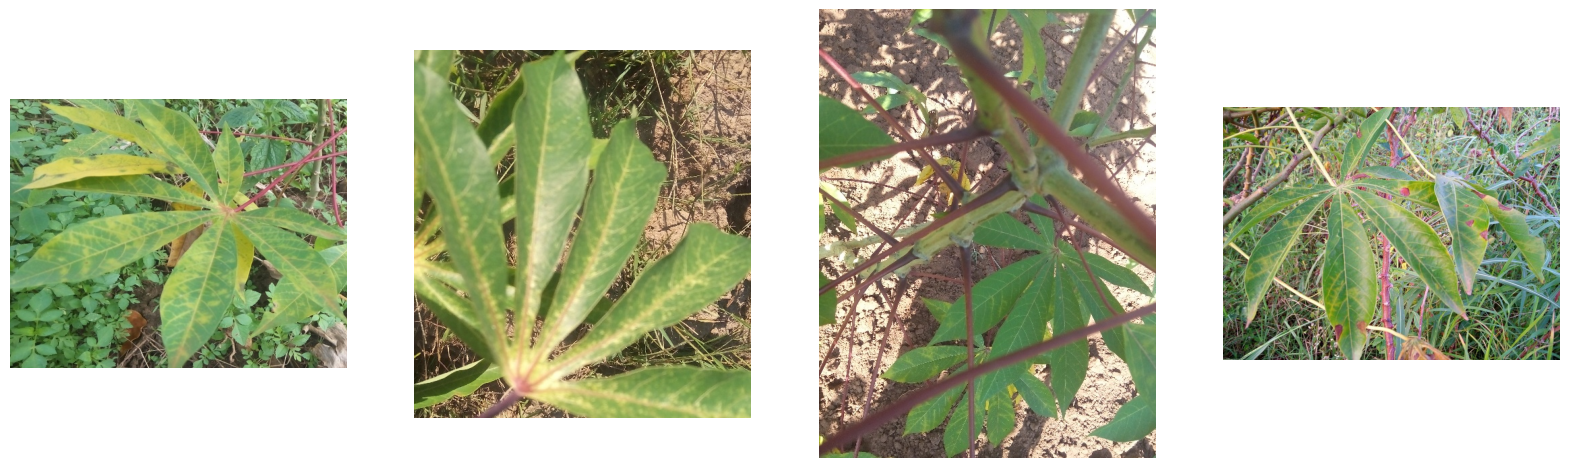

In [10]:
print ("a Random images of cassava-brown-streak-disease-cbsd class :")
print ("")
sample_images(train_dir,"cassava-brown-streak-disease-cbsd")

a Random images of cassava-green-mottle-cgm class :



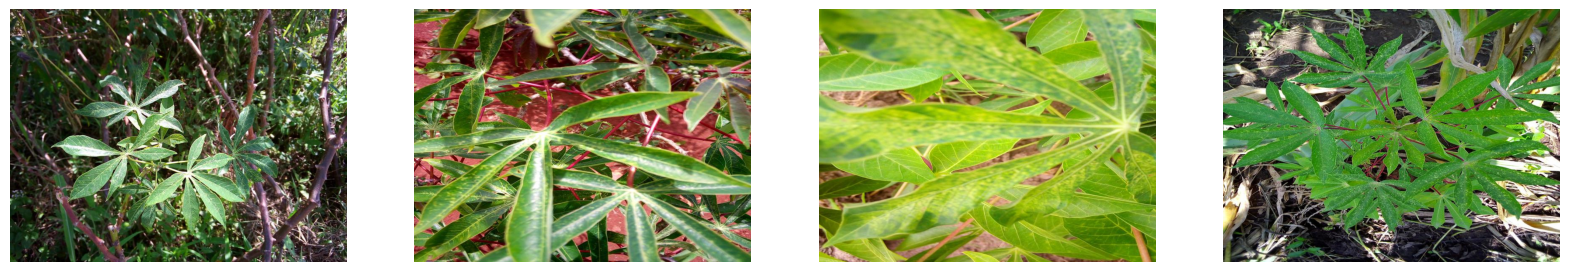

In [11]:
print ("a Random images of cassava-green-mottle-cgm class :")
print ("")
sample_images(train_dir,"cassava-green-mottle-cgm")

In [12]:
print ("a Random images of cassava-bacterial-blight-cbb class :")
print ("")
sample_images(train_dir,"cassava-bacterial-blight-cbb")

a Random images of cassava-bacterial-blight-cbb class :



## preparing our data

In [13]:
# importing ConvertToRGB function from src.utils
from utils.ConvertToRGB import ConvertToRGB

transform = transforms.Compose(
    [
        ConvertToRGB(),
        transforms.Resize((224,224)),
        transforms.ToTensor()
    ]
)


#now lets transform our data 
dataset= datasets.ImageFolder(root=train_dir,transform=transform)

# makeing a data loaderwith batch_size 32 
batch_size=32
dataset_loader= DataLoader(dataset,batch_size=batch_size)

batch_shape = next(iter(dataset_loader))[0].shape
print("Getting batches of shape:", batch_shape)

Getting batches of shape: torch.Size([32, 3, 224, 224])


## Now ormalize our data

In [14]:
# getting mean and std of the 3 channels by using get_mean_std function

from utils.get_mean_std import get_mean_std

mean, std= get_mean_std(dataset_loader)

print (f"Mean = {mean}")
print (f"std = {std}")

Mean = tensor([0.4326, 0.4952, 0.3120])
std = tensor([0.2179, 0.2214, 0.2091])


In [15]:
# now normalize our data 

transform_norm = transforms.Compose(
    [
        ConvertToRGB(),
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=mean,std=std)
    ]
)

norm_dataset= datasets.ImageFolder(root= train_dir, transform=transform_norm)
norm_loader= DataLoader(norm_dataset,batch_size=32)

batch_shape = next(iter(norm_loader))[0].shape
print("Getting batches of shape:", batch_shape)

Getting batches of shape: torch.Size([32, 3, 224, 224])


## Train-Validation Split

In [16]:
train_dataset, val_dataset = random_split(norm_dataset,[.8,.2])

length_train = len(train_dataset)
length_val = len(val_dataset)
length_dataset = len(norm_dataset)
percent_train = np.round(100 * length_train / length_dataset, 2)
percent_val = np.round(100 * length_val / length_dataset, 2)

print(f"Train data is {percent_train}% of full data")
print(f"Validation data is {percent_val}% of full data")

Train data is 80.0% of full data
Validation data is 20.0% of full data


In [17]:
# showing classes distribution in train and vlaid dataset by using class_counts function  
from utils.class_counts import class_counts
train_counts= class_counts(train_dataset)
val_counts = class_counts(val_dataset)


100%|██████████| 2980/2980 [00:41<00:00, 71.24it/s]


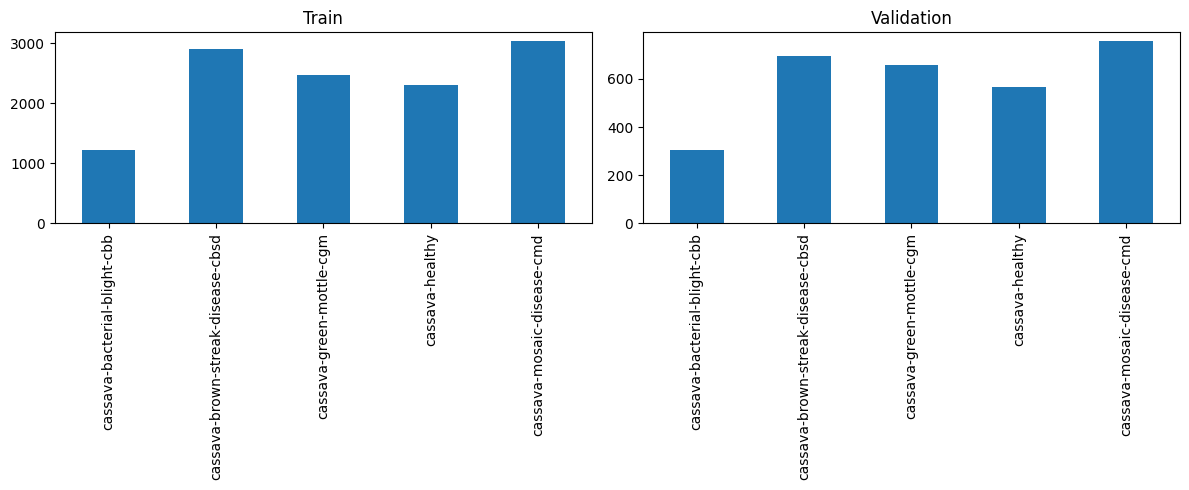

In [18]:
# plot the distributions 
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
train_counts.plot(kind="bar", title="Train")

plt.subplot(1, 2, 2)
val_counts.plot(kind="bar", title="Validation")

plt.tight_layout()
plt.show()

## Data Undersampling 
### because of un balance distribution of the classes we will correct that by undersampling 

In [21]:
# undersampling data by using undersample_dataset function
from utils.undersample_dataset import undersample_dataset

# creat out_dir 
out_dir= os.path.join (data_dir,"data_undersampled2/train")
print(out_dir)

undersample_dataset(train_dir,out_dir)

../data_p2/data_undersampled2/train
Copying images for class cassava-healthy


100%|██████████| 1523/1523 [00:01<00:00, 1366.91it/s]


Copying images for class cassava-mosaic-disease-cmd


100%|██████████| 1523/1523 [00:01<00:00, 1189.19it/s]


Copying images for class cassava-brown-streak-disease-cbsd


100%|██████████| 1523/1523 [00:01<00:00, 1279.22it/s]


Copying images for class cassava-green-mottle-cgm


100%|██████████| 1523/1523 [00:01<00:00, 1190.53it/s]


Copying images for class cassava-bacterial-blight-cbb


100%|██████████| 1523/1523 [00:01<00:00, 1383.87it/s]

Undersampling completed. Each class has up to 1523 instances.
